In [8]:
import os
import sys
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [7]:
def get_resfile_list():
    flist = []
    for tsvfile in glob.glob('results/ecoli/*.kojak.txt'):
        flist.append(tsvfile)
    return flist
res_list = get_resfile_list()
res_list

['results/ecoli/DESTRibo_092010exp2_LE_1and2rejected.kojak.txt',
 'results/ecoli/DESTRibo_092010exp2_LEF10.kojak.txt',
 'results/ecoli/DESTRibo_092010exp2_LEF1_101012172356.kojak.txt',
 'results/ecoli/DESTRibo_092010exp2_LEF2.kojak.txt',
 'results/ecoli/DESTRibo_092010exp2_LEF3.kojak.txt',
 'results/ecoli/DESTRibo_092010exp2_LEF4.kojak.txt',
 'results/ecoli/DESTRibo_092010exp2_LEF5.kojak.txt',
 'results/ecoli/DESTRibo_092010exp2_LEF6.kojak.txt',
 'results/ecoli/DESTRibo_092010exp2_LEF7.kojak.txt',
 'results/ecoli/DESTRibo_092010exp2_LEF8.kojak.txt',
 'results/ecoli/DESTRibo_092010exp2_LEF9.kojak.txt',
 'results/ecoli/DESTRibo_092010exp2_WD_1and2rejected.kojak.txt',
 'results/ecoli/DESTRibo_092210exp2_LE_1and2rejected.kojak.txt',
 'results/ecoli/DESTRibo_092210exp2_LEF10.kojak.txt',
 'results/ecoli/DESTRibo_092210exp2_LEF1.kojak.txt',
 'results/ecoli/DESTRibo_092210exp2_LEF2.kojak.txt',
 'results/ecoli/DESTRibo_092210exp2_LEF3.kojak.txt',
 'results/ecoli/DESTRibo_092210exp2_LEF4.kojak.t

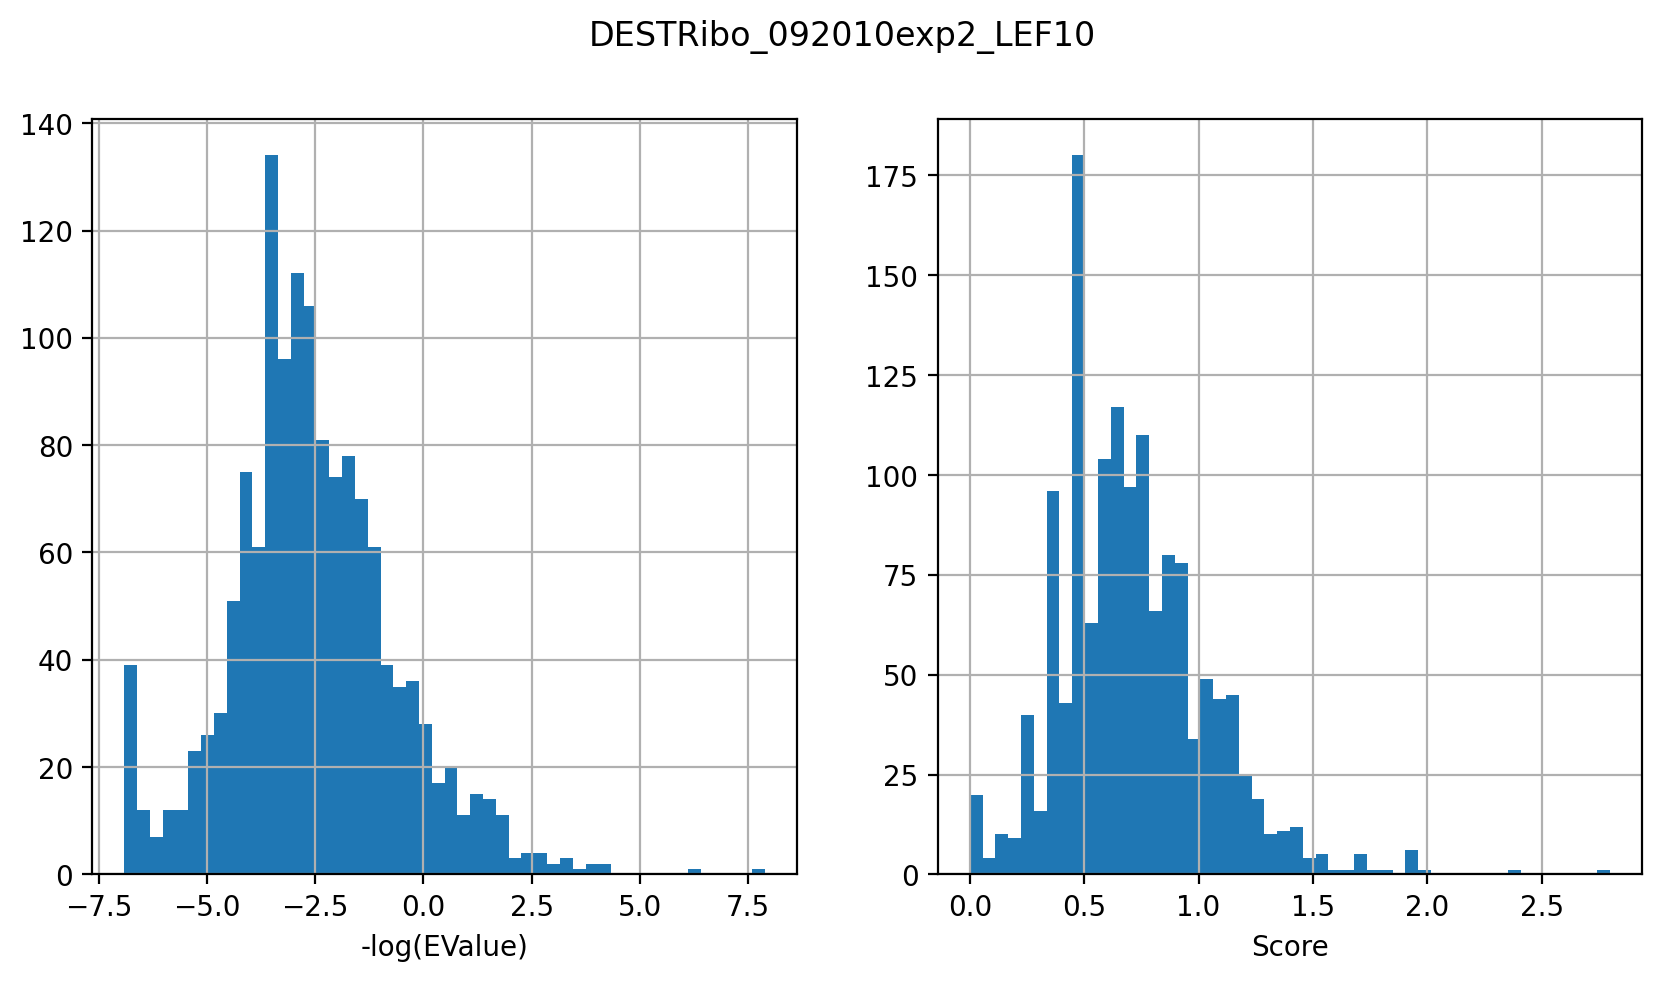

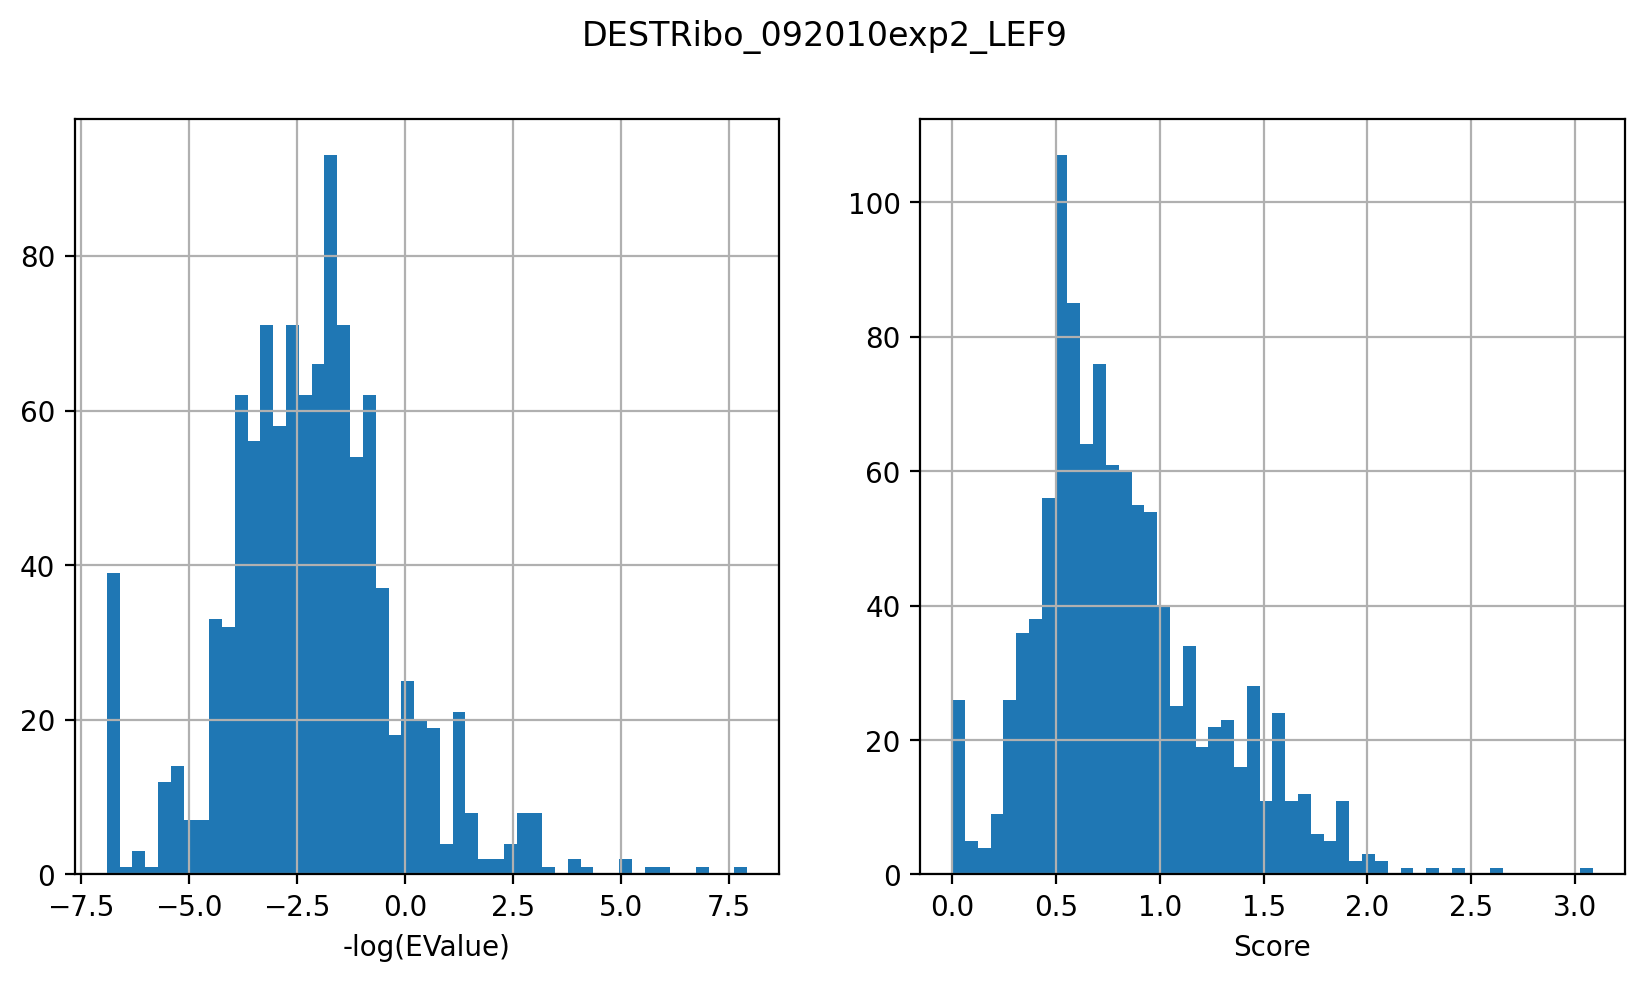

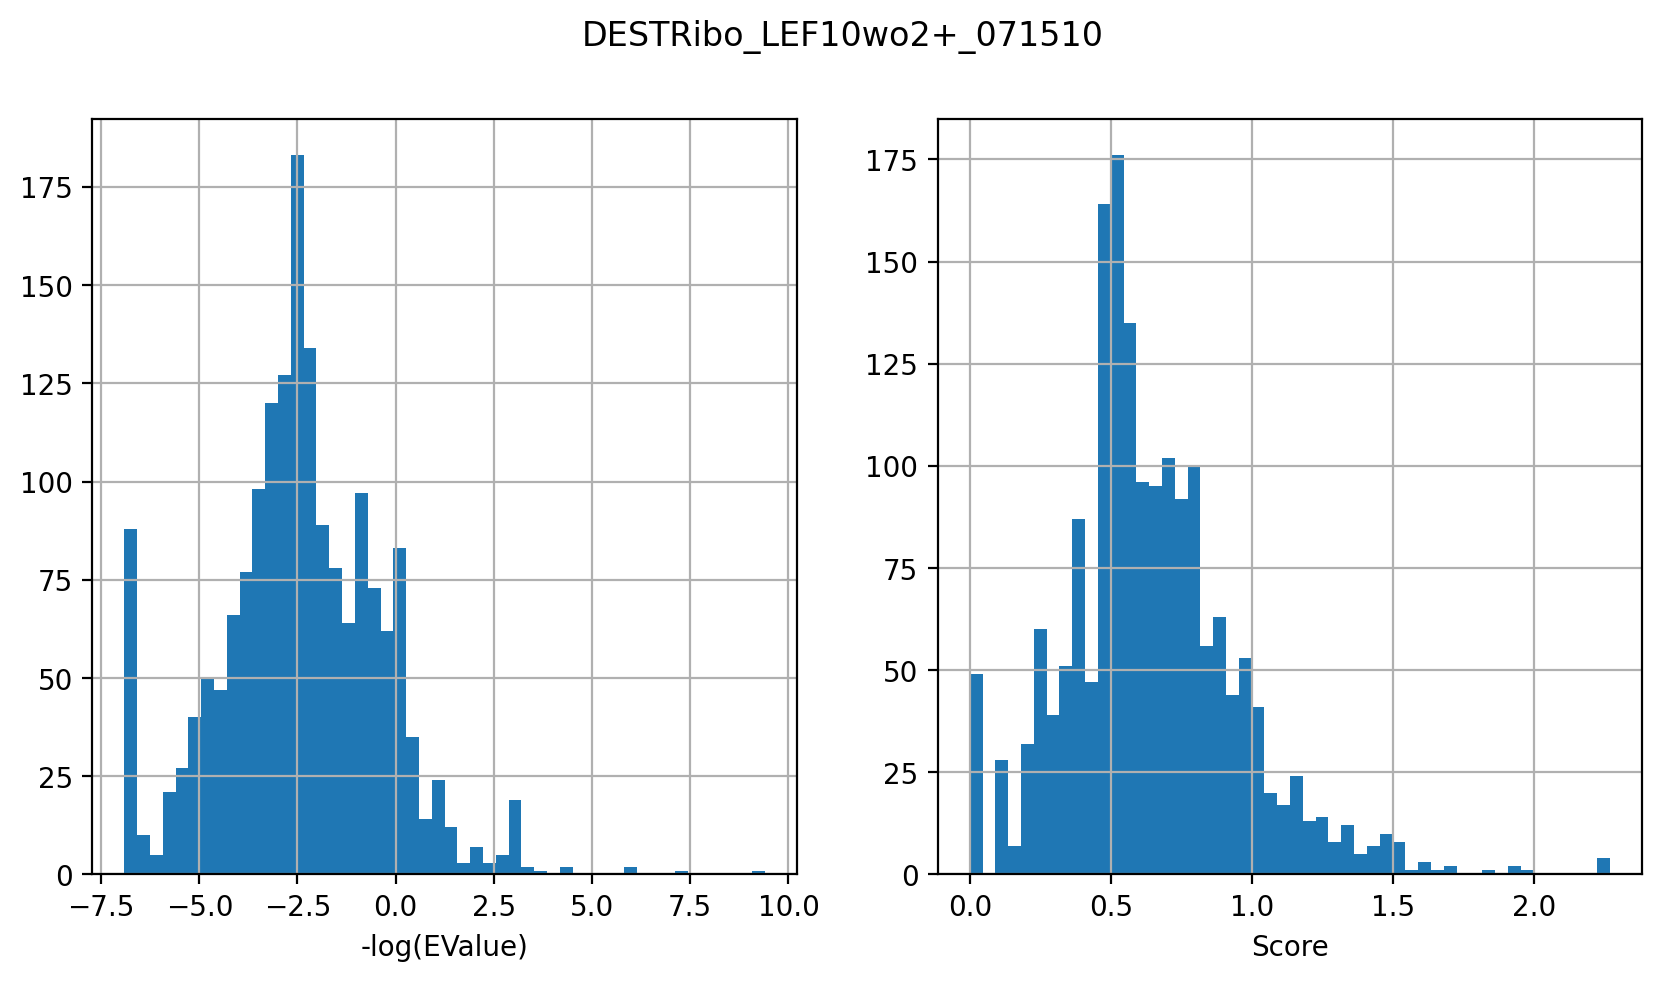

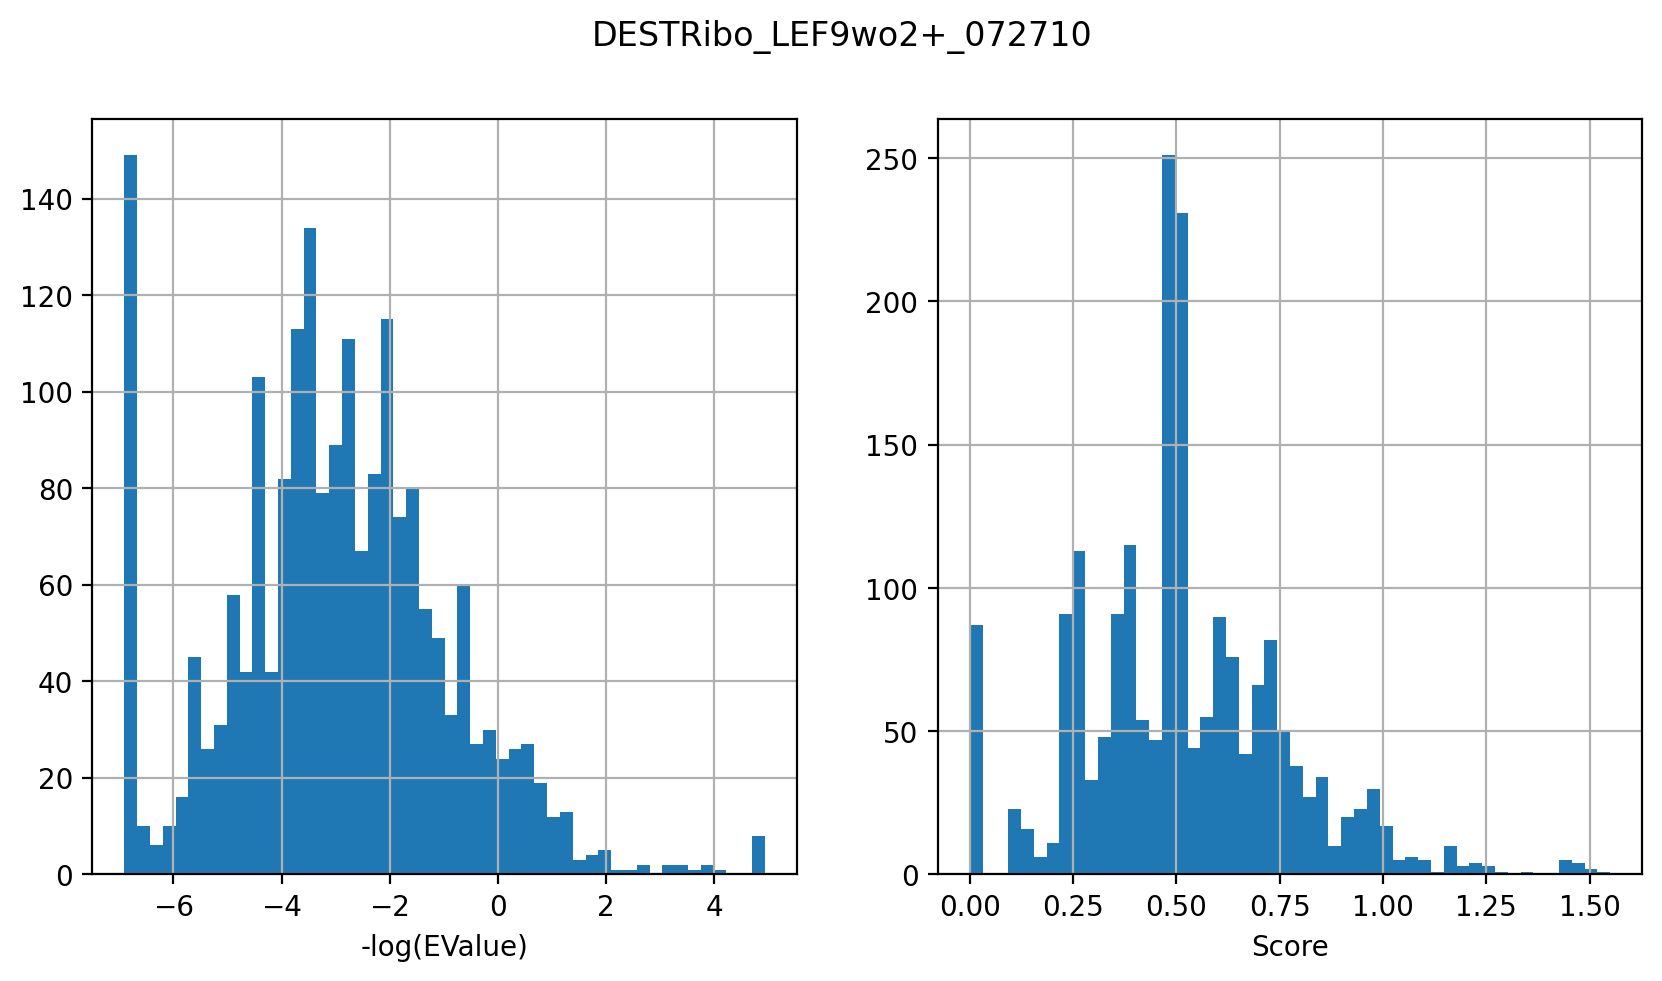

In [49]:
def parse_res(resf):
    resf = open(resf)
    resf.readline()
#     print(resf.readline())
    try:
        res = pd.read_csv(resf, delimiter='\t')
        return res
    except Exception as e:
#         print(e)
        pass

def analyze_all_results(res_list):
    results = []
    for resf in res_list:
#         print(list(open(resf)))
        res = parse_res(resf)
        if res is None:
            continue
        results.append(res)
#         print(res['E-value'])
        plt.figure(figsize=[10,5], dpi=200)
        plt.subplot(1,2,1)
        res['E-value'].apply(lambda x:-np.log(x)).hist(bins=50)
        plt.xlabel('-log(EValue)')
        
        plt.subplot(1,2,2)
        res['Score'].hist(bins=50)
        plt.xlabel('Score')
        plt.suptitle(resf.split('/')[2].split('.')[0])
#         break
    return results
results = analyze_all_results(res_list)